In [9]:
! pip install tiktoken
! pip install matplotlib
! pip install wordcloud
! pip install pandas
! pip install nltk


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [12]:
import pandas as pd

df = pd.read_csv('dataset/bbc_news.csv', on_bad_lines='skip', quoting=3)
df.head()


,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2234 entries, 0 to 2233
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2232 non-null   object
 1   text      2232 non-null   object
dtypes: object(2)
memory usage: 35.0+ KB


In [14]:
category_count = df['category'].value_counts()
text_count = df['text'].value_counts()
print(category_count)
print(text_count)

category
business         512
sport            512
politics         421
tech             400
entertainment    387
Name: count, dtype: int64
text
tautou  to star in da vinci film  french actress audrey tautou  star of hit film amelie  will play the female lead in the film adaptation of the da vinci code  it has been reported.  the movie version of dan brown s best-selling novel is being directed by ron howard and also stars tom hanks. tautou will play hanks  code-cracking partner  according to various newspapers. she is currently starring in a very long engagement  directed by jean-pierre jeunet. jeunet was also responsible for directing tautou in amelie in 2001  which launched the actress into the mainstream.  she also starred as the lead role in critically-acclaimed film dirty pretty things in 2002. oscar-winning director ron howard chose tautou for the part  preferring a french actress to a big name hollywood star. uk actress kate beckinsale had been widely tipped as a possibility fo

In [24]:
len(df["text"])


2122

In [20]:
len(df["text"].unique())

2125

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
null_values = df.isnull().sum()
print(null_values)

category    2
text        2
dtype: int64


Remove null values

In [23]:
df.dropna(inplace=True)

In [21]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter


In [22]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mandipdhakal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/mandipdhakal/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mandipdhakal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
target_label = 'business'
target_df = df[df['category'] == target_label]

In [26]:
target_words = [
    word.lower()
    for prompt in target_df['text']
    for word in word_tokenize(prompt)
    if word.isalnum() and word.lower() not in stopwords.words('english')
]

target_word_counts = Counter(target_words)
print(target_word_counts)

Counter({'said': 1651, 'us': 788, 'year': 622, 'mr': 596, 'would': 459, 'also': 431, 'market': 417, 'company': 411, 'new': 400, 'growth': 362, 'firm': 356, 'last': 354, 'economy': 341, 'government': 333, 'bank': 331, 'sales': 316, 'economic': 302, 'could': 301, 'oil': 291, 'shares': 264, 'however': 253, 'world': 250, 'may': 245, 'years': 244, 'prices': 243, 'one': 238, '2004': 234, 'chief': 231, '000': 229, 'two': 227, 'business': 216, 'china': 213, 'companies': 211, 'deal': 206, 'analysts': 205, 'uk': 204, 'rise': 200, 'group': 197, 'expected': 196, 'yukos': 196, 'financial': 194, 'since': 178, 'dollar': 177, 'firms': 175, 'country': 171, 'people': 169, 'december': 167, 'months': 165, 'stock': 163, 'president': 162, 'still': 161, 'many': 160, 'first': 159, 'time': 158, 'european': 156, 'trade': 156, 'told': 155, 'three': 155, 'investment': 153, 'state': 153, 'india': 151, 'rate': 150, 'profits': 148, 'made': 147, 'demand': 147, 'countries': 146, 'interest': 145, 'figures': 144, 'execu

In [27]:
word_cloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(target_word_counts)

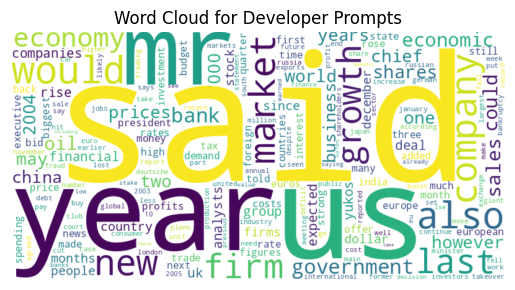

In [28]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Developer Prompts')
plt.show()

Using TikToken Library to get the token count so that we know the pricing.

In [29]:
import tiktoken

In [32]:
def cal_num_tokens_from_row(prompt, encoding_name: str) -> int:
    encoding = tiktoken.encoding_for_model(encoding_name)
    token_count = len(encoding.encode(prompt))
    return token_count

def cal_num_tokens_from_df(df, encoding_name: str) -> int:
    total_tokens = 0
    for prompt in df['text']:
        total_tokens += cal_num_tokens_from_row(prompt, encoding_name)
    return total_tokens

In [33]:
total_token = cal_num_tokens_from_df(target_df, 'gpt-3.5-turbo')
print(f'Total tokens in developer prompts: {total_token}')

Total tokens in developer prompts: 216623


Creating Dataset to feed into LLM

In [35]:
import csv
import os 
import random

In [36]:
rows = [{'text': row['text'].strip(), 
         'label': row['category'],
         } for _, row in df.iterrows()]

In [37]:
random.seed(42)
random.shuffle(rows)

In [54]:
num_test = 100
splits = {'test': rows[num_test:],
'train': rows[:num_test]}

Create train and test datasets

In [55]:
for split in ['train', 'test']:
    with open(f'dataset/{split}.csv', 'w', newline='', encoding='utf-8') as csvfile:
        fieldnames = ['text', 'label']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for row in splits[split]:
            writer.writerow(row)

In [42]:
import json



In [56]:
df = pd.read_csv('dataset/train.csv', encoding='utf-8')
final_df = df.head(100)
total_token = cal_num_tokens_from_df(final_df, 'gpt-3.5-turbo')
print(f'Total tokens in final training dataset: {total_token}')

Total tokens in final training dataset: 48490


In [57]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    100 non-null    object
 1   label   100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


Convert CSV to JSONL format

In [58]:
system = "You are a helpful assistant that classifies BBC news articles into their respective categories such as business, entertainment, politics, sport, and tech."
with open('dataset/train.jsonl', 'w', encoding='utf-8') as jsonl_file:
    for _, row in final_df.iterrows():
        open_ai_format = {
            "messages": [
                {"role": "system", "content": system },
                {"role": "user", "content": row['text']},
                {"role": "assistant", "content": row['label']}
            ]
        }
        json.dump(open_ai_format, jsonl_file)
        jsonl_file.write('\n')

In [61]:
df = pd.read_csv('dataset/test.csv', encoding='utf-8')
final_df = df.head(100)
total_token = cal_num_tokens_from_df(final_df, 'gpt-3.5-turbo')
print(f'Total tokens in final training dataset: {total_token}')

Total tokens in final training dataset: 46024


In [62]:
system = "You are a helpful assistant that classifies BBC news articles into their respective categories such as business, entertainment, politics, sport, and tech."
with open('dataset/test.jsonl', 'w', encoding='utf-8') as jsonl_file:
    for _, row in final_df.iterrows():
        open_ai_format = {
            "messages": [
                {"role": "system", "content": system },
                {"role": "user", "content": row['text']},
                {"role": "assistant", "content": row['label']}
            ]
        }
        json.dump(open_ai_format, jsonl_file)
        jsonl_file.write('\n')